## Actividad 8: Aprendizaje Supervisado (Clasificación o Regresión)
Fecha de entrega: 25 de enero

El objetivo es aplicar técnicas de aprendizaje supervisado para resolver un problema real de clasificación o regresión, siguiendo un flujo completo de ciencia de datos: exploración, preparación, modelado, evaluación y conclusiones.

Cada estudiante deberá elegir UNA de las dos opciones descritas a continuación.

Opción A: Clasificación – Dataset Titanic
Dataset: Titanic Dataset (Kaggle) https://www.kaggle.com/datasets/amineipad/titanic-dataset
Problema: Predecir si un pasajero sobrevivió o no al hundimiento del Titanic por medio de la variable Survived (0 = No sobrevivió, 1 = Sobrevivió)

Opción B: Regresión – Medical Insurance Cost Dataset
Dataset: Medical Insurance Cost Dataset (Kaggle) https://www.kaggle.com/datasets/mosapabdelghany/medical-insurance-cost-dataset
Problema: Predecir el costo del seguro médico de una persona por medio de la variable númerica charges (costo del seguro)

Para cualquiera de las dos opciones deben comparar almenos 3 modelos diferentes e interpretar los resultados obtenidos por medio de gráficas (Matriz de confusión para clasificacion o Valores reales VS predichos en regresión. Pueden incluir más gráficas si lo desean)

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.tree import plot_tree

In [ ]:
df = pd.read_csv('dataset_titanic/train.csv') 
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [8]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [9]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [10]:
X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Primer Modelo a usar: Regresión Lineal  

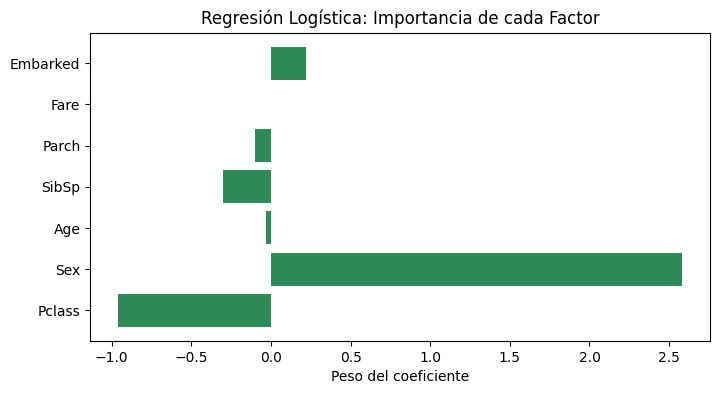

In [27]:
# Entrenar
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Graficar coeficientes
importances = log_model.coef_[0]
plt.figure(figsize=(8, 4))
plt.barh(X.columns, importances, color='seagreen')
plt.title("Regresión Logística: Importancia de cada Factor")
plt.xlabel("Peso del coeficiente")
plt.show()

**Análisis de Coeficientes:** Esta gráfica nos muestra que el Sexo es la variable con más peso positivo (ser mujer aumentaba drásticamente la probabilidad de sobrevivir), mientras que la Clase (Pclass) tiene un peso negativo (a mayor número de clase, es decir 3ra clase, menor probabilidad de sobrevivir).

## Segundo Modelo a usar: Árbol de decisión  

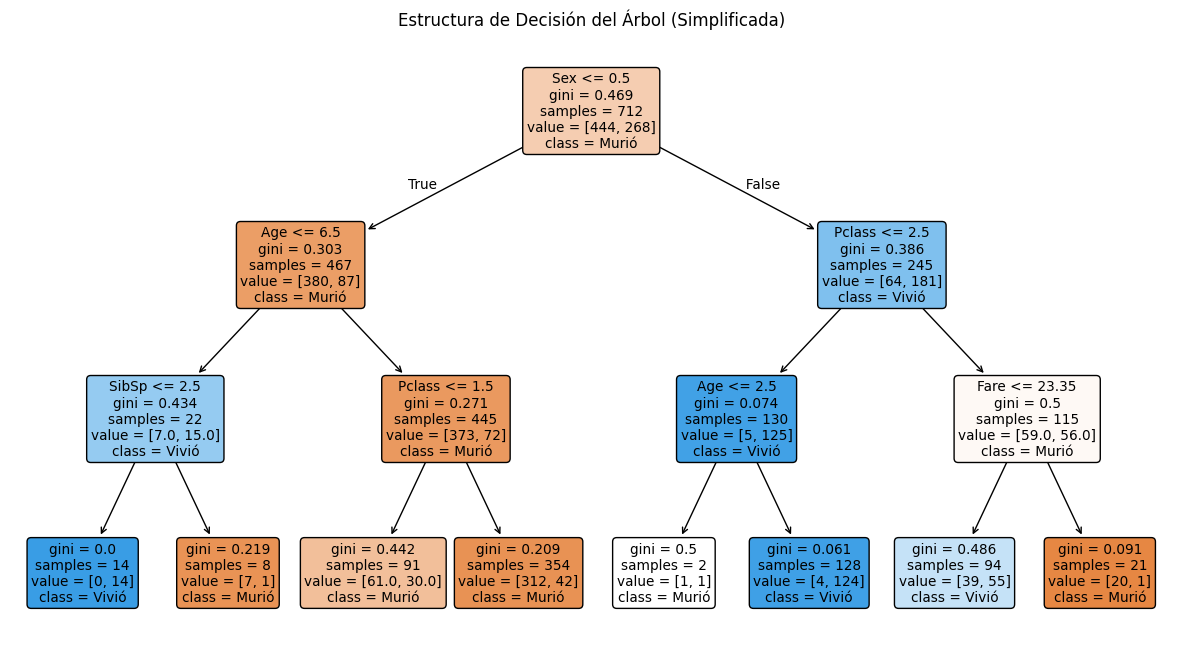

In [29]:
tree_model = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_model.fit(X_train, y_train)

plt.figure(figsize=(15, 8))
plot_tree(tree_model, feature_names=X.columns, class_names=['Murió', 'Vivió'], filled=True, rounded=True)
plt.title("Estructura de Decisión del Árbol (Simplificada)")
plt.show()

**Estructura de Decisión:** Aquí observamos el "razonamiento" del modelo. El primer nodo (el más importante) divide a los pasajeros por Sexo. Si es hombre (Sex <= 0.5), el modelo luego mira la Edad. Si es mujer, mira la Clase. Esto nos permite ver visualmente cómo se segmentó a la población durante la tragedia para predecir su destino.

## Tercer Modelo a usar: Random Forest

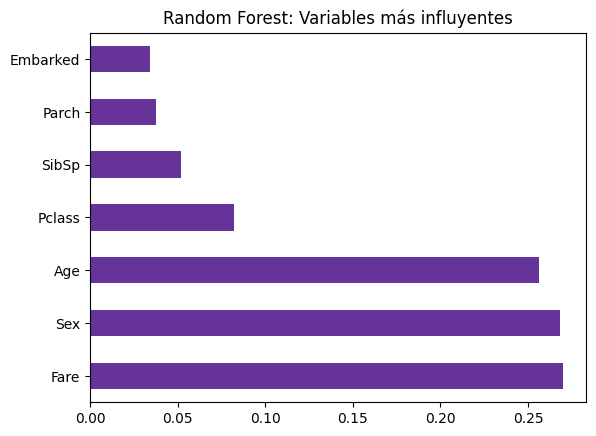

In [30]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

feat_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh', color='rebeccapurple')
plt.title("Random Forest: Variables más influyentes")
plt.show()

**Importancia de Características (Feature Importance):** A diferencia de un solo árbol, el Random Forest promedia cientos de ellos. Aquí vemos que la Tarifa (Fare) y la Edad (Age) ganan mucha importancia. Esto indica que el modelo encontró patrones más complejos y detallados que los modelos anteriores, lo que suele traducirse en una mayor exactitud.

## Matriz de confusión de los modelos evaluados

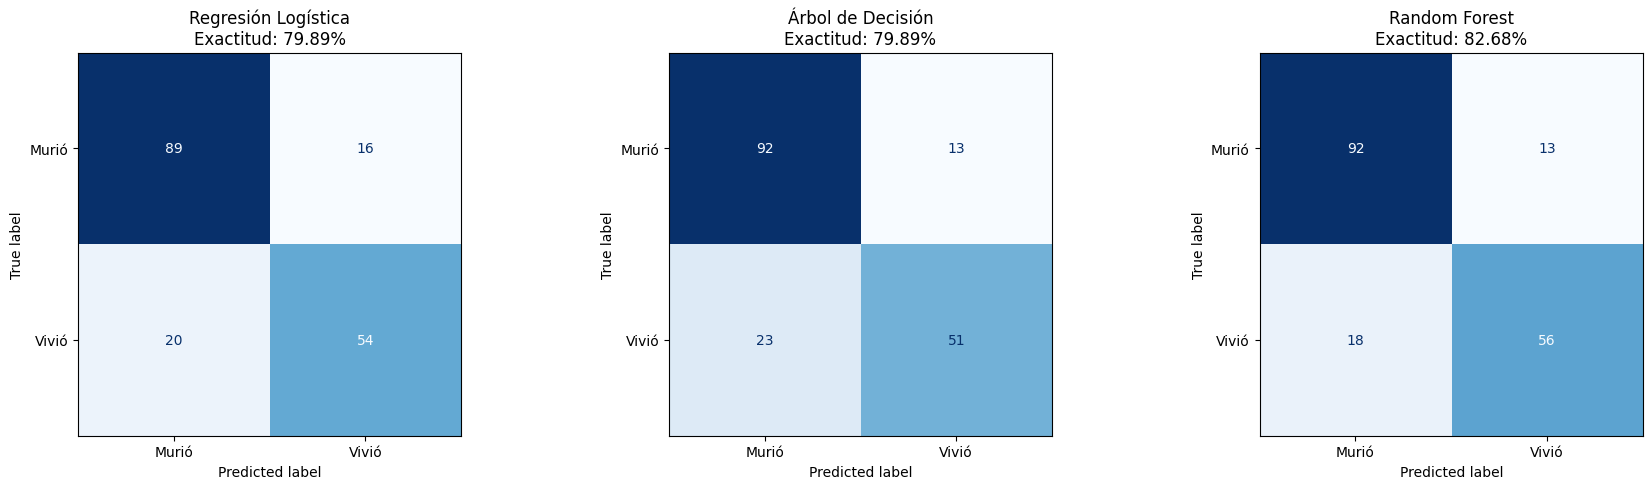

In [31]:
# Creamos la figura para comparar las 3 matrices al final
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

modelos_final = {
    "Regresión Logística": log_model,
    "Árbol de Decisión": tree_model,
    "Random Forest": rf_model
}

for i, (nombre, model) in enumerate(modelos_final.items()):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Murió', 'Vivió'])
    disp.plot(ax=axes[i], cmap='Blues', colorbar=False)
    axes[i].set_title(f"{nombre}\nExactitud: {acc:.2%}")

plt.tight_layout()
plt.show()

## Conclusión Final

Tras completar el flujo de ciencia de datos para el dataset Titanic, estas son las conclusiones principales:

1. Comparativa de Modelos:

    * Tanto la **Regresión Logística** como el **Árbol de Decisión** mostraron un rendimiento idéntico con una exactitud del 79.89%. Esto indica que, incluso con estructuras diferentes, ambos capturaron los patrones básicos de supervivencia.

    * El **Random Forest** fue el modelo ganador con una exactitud del 82.68%. Este incremento se debe a su capacidad de combinar múltiples árboles para reducir errores y encontrar relaciones más complejas entre variables como la edad y la tarifa.

2. Análisis de las Matrices de Confusión:

    * Observando las matrices finales, los tres modelos son muy consistentes prediciendo los fallecimientos (Verdaderos Negativos). Por ejemplo, el Random Forest identificó correctamente a 92 personas que no sobrevivieron.

    * El mayor reto para los modelos fue predecir las supervivencias (Verdaderos Positivos), donde el Random Forest logró rescatar a 56 pasajeros correctamente, superando ligeramente a los otros dos.

3. Factores Determinantes:

    * Gracias a las gráficas de importancia, se confirma que el Sexo y la Clase del Pasajero fueron los factores más críticos. Ser mujer y viajar en primera clase aumentaba significativamente las probabilidades de supervivencia según la lógica interna del Árbol de Decisión y los coeficientes de la Regresión Logística.